In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

In [2]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [4]:
# EDA

In [5]:
# is there any NULL value in the table?
df.isnull().sum().max()

0

Text(0.5, 1.0, 'not fraud vs fraud')

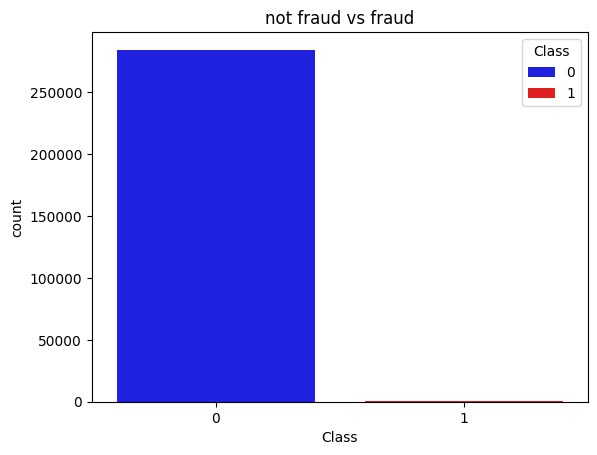

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["blue", "red"]

sns.countplot(x='Class', data=df, hue='Class', palette=colors)
plt.title('not fraud vs fraud', fontsize = 12)

In [7]:
# 'Amount' and 'Time' columns are not scaled, but others did
# So we should scale them as well...

In [8]:
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)


In [9]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


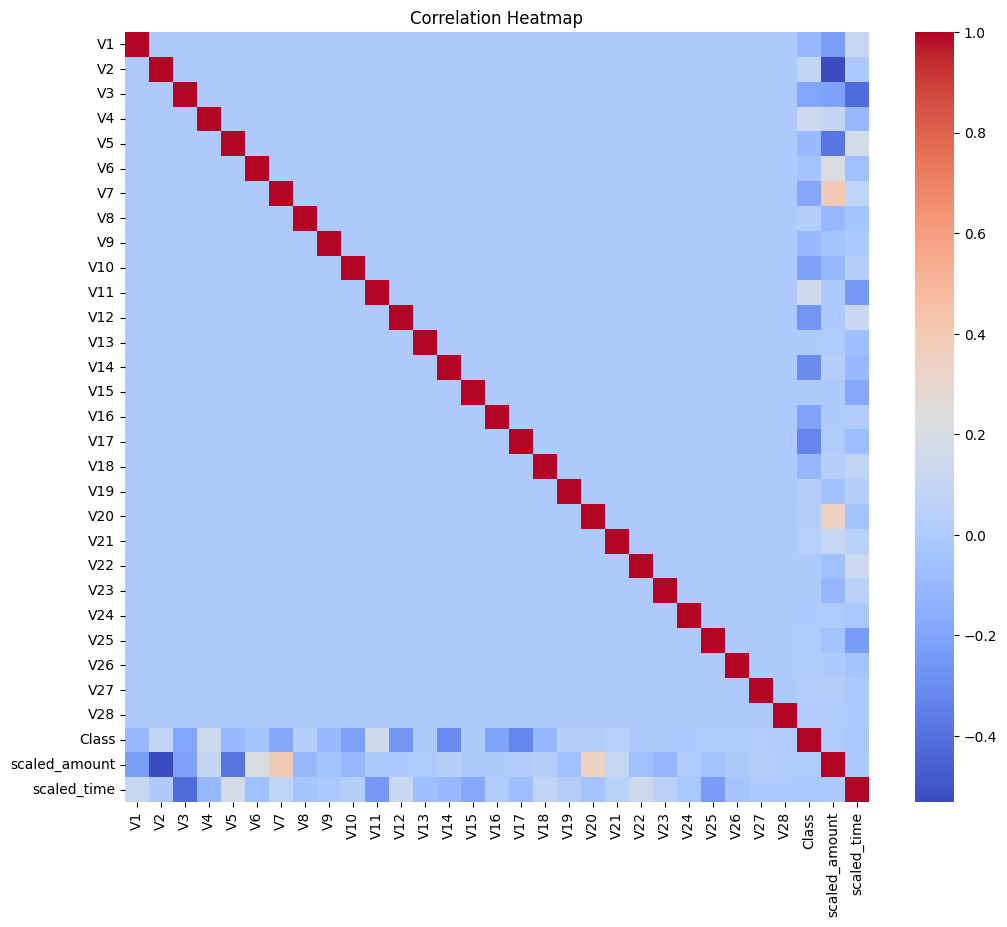

In [10]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

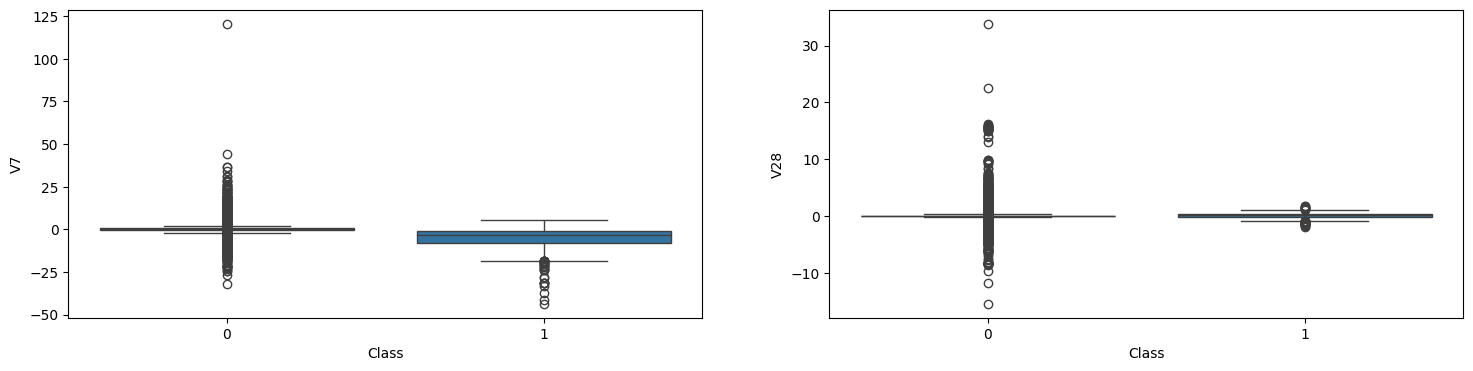

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))
sns.boxplot(x="Class", y="V7", data=df, ax=ax[0])
sns.boxplot(x="Class", y="V28", data=df, ax=ax[1])
plt.show()

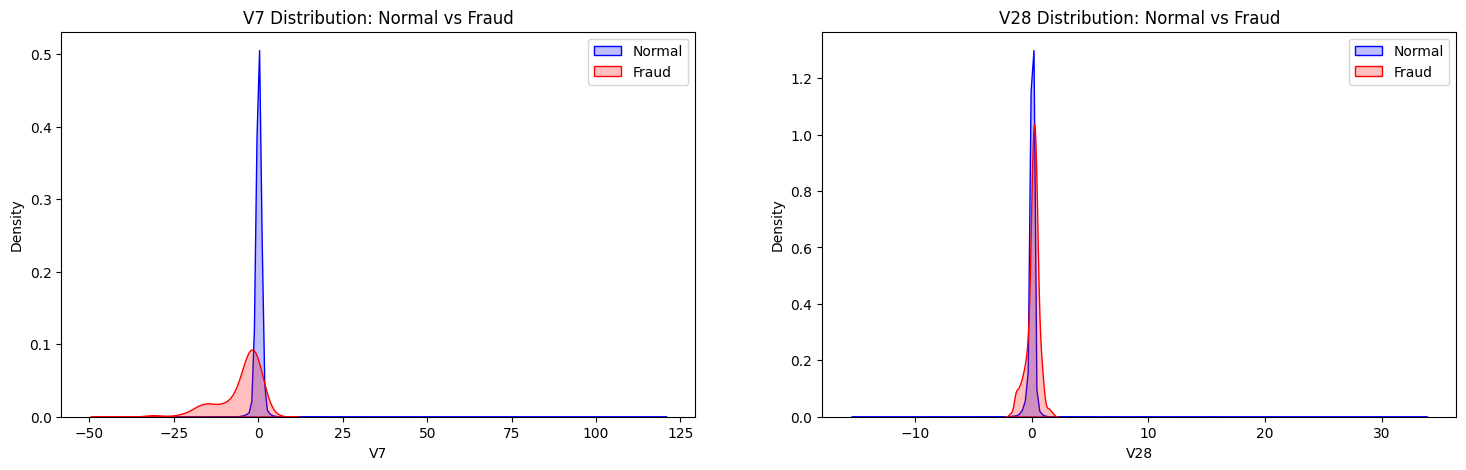

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.kdeplot(df[df['Class'] == 0]["V7"], label='Normal', fill=True, ax=ax[0], color='blue')
sns.kdeplot(df[df['Class'] == 1]["V7"], label='Fraud', fill=True, ax=ax[0], color='red')
ax[0].set_title("V7 Distribution: Normal vs Fraud")
ax[0].legend()
sns.kdeplot(df[df['Class'] == 0]["V28"], label='Normal', fill=True, ax=ax[1], color='blue')
sns.kdeplot(df[df['Class'] == 1]["V28"], label='Fraud', fill=True, ax=ax[1], color='red')
ax[1].set_title("V28 Distribution: Normal vs Fraud")
ax[1].legend()
plt.show()

In [ ]:
# don't split dataset randomly, better take 20% of 0s and 20% of 1s 
# and sum up onto one test set.

# use stratify of train_test_split

In [16]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20,      
    random_state=42,
    stratify=y
)

print("original:")
print(y.value_counts(normalize=True))

print("y_train:")
print(y_train.value_counts(normalize=True))

print("y_test:")
print(y_test.value_counts(normalize=True))

original:
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64
y_train:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
y_test:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


try some baseline models

In [18]:
baseline_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

In [19]:
results = []

for name, model in baseline_models.items():
    print(f"Training {name}...")
    
    model.fit(X_train, y_train)
    
    # Предсказание
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        "Model": name,
        "Recall": report['1']['recall'],
        "Precision": report['1']['precision'],
        "F1-Score": report['1']['f1-score'],
        "ROC-AUC": roc_auc_score(y_test, y_probs),
        "PR-AUC": average_precision_score(y_test, y_probs)
    })

baseline_df = pd.DataFrame(results).sort_values(by='Recall', ascending=False)
print("\n--- Baseline Models Scores ---")
print(baseline_df)

Training Logistic Regression...
Training Random Forest...
Training XGBoost...

--- Baseline Models Scores ---
                 Model    Recall  Precision  F1-Score   ROC-AUC    PR-AUC
1        Random Forest  0.816327   0.941176  0.874317  0.952793  0.860751
2              XGBoost  0.795918   0.866667  0.829787  0.938952  0.797291
0  Logistic Regression  0.642857   0.818182  0.720000  0.958185  0.740246


training with SMOTE sampled train set

In [22]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f'before: {y_train.value_counts()}')
print(f'after: {y_train_res.value_counts()}')

before: Class
0    227451
1       394
Name: count, dtype: int64
after: Class
0    227451
1    227451
Name: count, dtype: int64


/tmp/ipykernel_55/75875336.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=dist_before, palette='pastel')
/tmp/ipykernel_55/75875336.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Count', data=dist_after, palette='pastel')


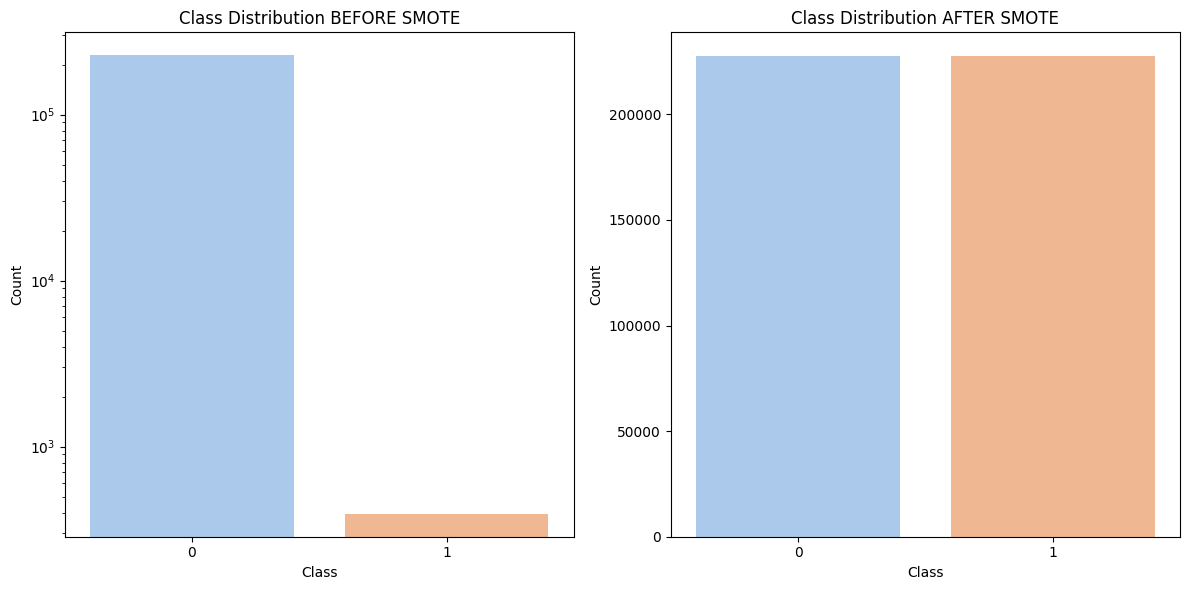

In [48]:
dist_before = y_train.value_counts().reset_index()
dist_before.columns = ['Class', 'Count']
dist_before['Status'] = 'Before SMOTE'

dist_after = y_train_res.value_counts().reset_index()
dist_after.columns = ['Class', 'Count']
dist_after['Status'] = 'After SMOTE'

df_resampling = pd.concat([dist_before, dist_after])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Class', y='Count', data=dist_before, palette='pastel')
plt.title('Class Distribution BEFORE SMOTE')
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.barplot(x='Class', y='Count', data=dist_after, palette='pastel')
plt.title('Class Distribution AFTER SMOTE')

plt.tight_layout()
plt.show()

In [24]:
results_smote = []

for name, model in baseline_models.items():
    print(f"Training {name} with SMOTE...")
    model.fit(X_train_res, y_train_res)
    
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]
    
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results_smote.append({
        "Model": name + " + SMOTE",
        "Recall": report['1']['recall'],
        "Precision": report['1']['precision'],
        "F1-Score": report['1']['f1-score'],
        "PR-AUC": average_precision_score(y_test, y_probs)
    })

smote_df = pd.DataFrame(results_smote)
print(smote_df)

Training Logistic Regression with SMOTE...
Training Random Forest with SMOTE...
Training XGBoost with SMOTE...
                         Model    Recall  Precision  F1-Score    PR-AUC
0  Logistic Regression + SMOTE  0.918367   0.059055  0.110974  0.723502
1        Random Forest + SMOTE  0.816327   0.879121  0.846561  0.868023
2              XGBoost + SMOTE  0.857143   0.717949  0.781395  0.867339


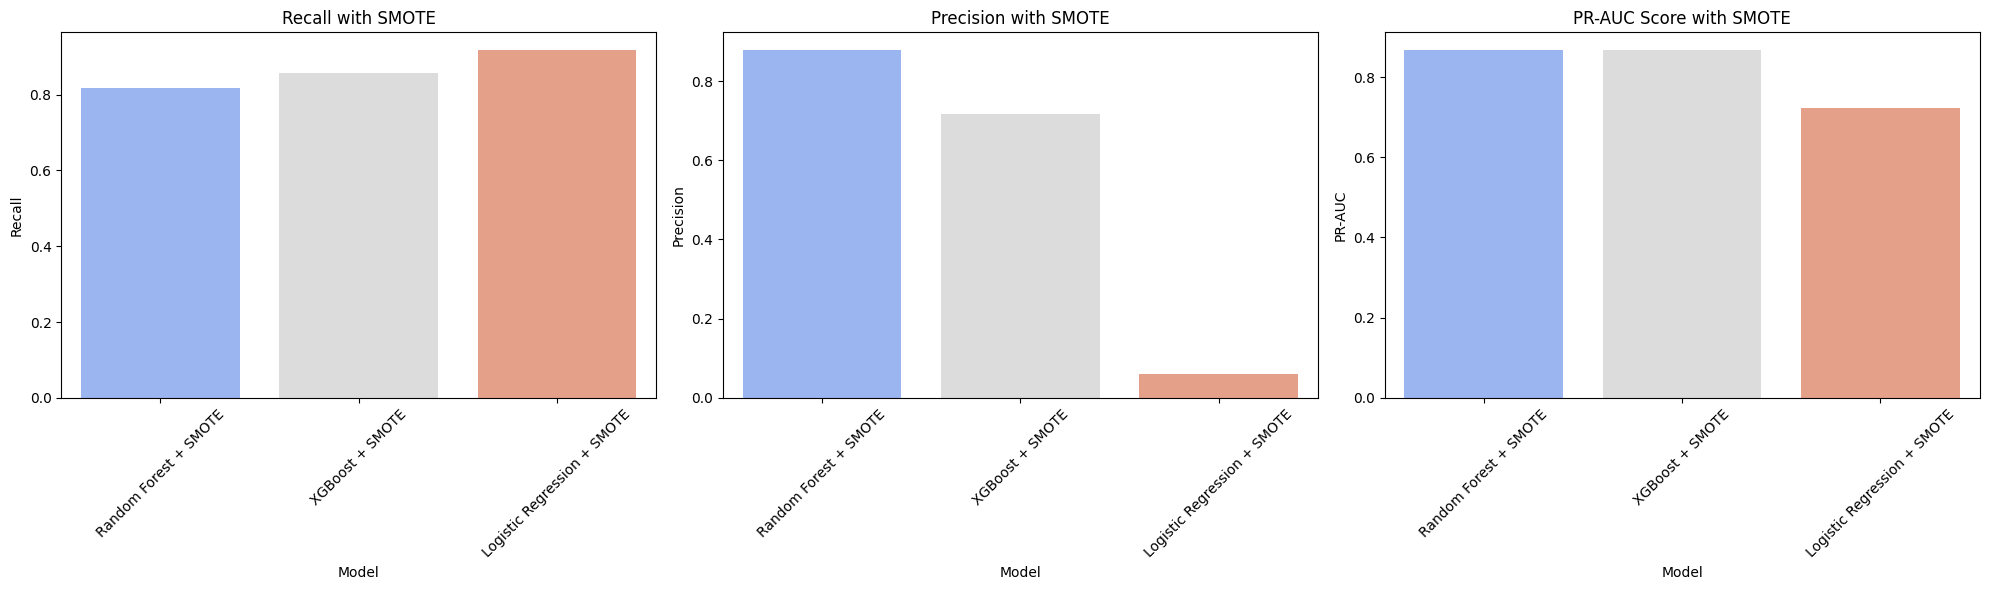

In [45]:
smote_df_sorted = smote_df.sort_values(by='PR-AUC', ascending=False)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(x='Model', y='Recall', hue='Model', data=smote_df_sorted, 
            palette='coolwarm', ax=ax1, legend=False)
ax1.set_title('Recall with SMOTE')
ax1.tick_params(axis='x', rotation=45)

sns.barplot(x='Model', y='Precision', hue='Model', data=smote_df_sorted, 
            palette='coolwarm', ax=ax2, legend=False)
ax2.set_title('Precision with SMOTE')
ax2.tick_params(axis='x', rotation=45)

sns.barplot(x='Model', y='PR-AUC', hue='Model', data=smote_df_sorted, 
            palette='coolwarm', ax=ax3, legend=False)
ax3.set_title('PR-AUC Score with SMOTE')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

perfect mid option for the other sample options is probably XGB 

In [31]:
baseline_models = {
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

let's try other sampling types and compare

In [34]:
samplers = {
    "Original": (X_train, y_train),
    "SMOTE": SMOTE(random_state=42).fit_resample(X_train, y_train),
    "Random Oversampling": RandomOverSampler(random_state=42).fit_resample(X_train, y_train),
    "Random Undersampling": RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)
}

In [35]:
final_results = []


for model_name, model in baseline_models.items():
    for sampler_name, (X_res, y_res) in samplers.items():
        print(f"Training {model_name} with {sampler_name}...")
        
        model.fit(X_res, y_res)
        
        y_pred = model.predict(X_test)
        y_probs = model.predict_proba(X_test)[:, 1]
        
        final_results.append({
            "Model": model_name,
            "Sampler": sampler_name,
            "Recall": recall_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "F1-Score": f1_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_probs),
            "PR-AUC": average_precision_score(y_test, y_probs)
        })

full_comparison_df = pd.DataFrame(final_results)

# pr-auc works well for imbalanced datasets
full_comparison_df = full_comparison_df.sort_values(by='PR-AUC', ascending=False)
print(full_comparison_df)

Training XGBoost with Original...
Training XGBoost with SMOTE...
Training XGBoost with Random Oversampling...
Training XGBoost with Random Undersampling...
     Model               Sampler    Recall  Precision  F1-Score   ROC-AUC  \
2  XGBoost   Random Oversampling  0.867347   0.894737  0.880829  0.976797   
1  XGBoost                 SMOTE  0.857143   0.717949  0.781395  0.977898   
0  XGBoost              Original  0.795918   0.866667  0.829787  0.938952   
3  XGBoost  Random Undersampling  0.918367   0.033607  0.064841  0.972128   

     PR-AUC  
2  0.879819  
1  0.867339  
0  0.797291  
3  0.409905  


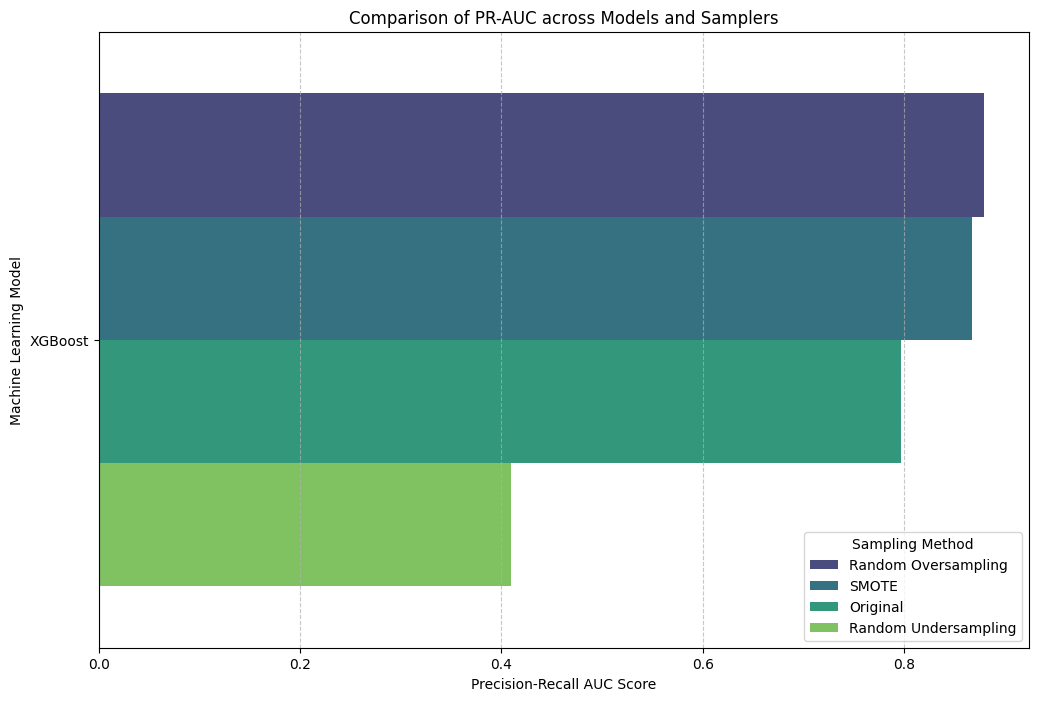

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(x='PR-AUC', y='Model', hue='Sampler', data=full_comparison_df, palette='viridis')

plt.title('Comparison of PR-AUC across Models and Samplers')
plt.xlabel('Precision-Recall AUC Score')
plt.ylabel('Machine Learning Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.legend(title='Sampling Method', loc='lower right')

plt.show()

**Random Oversampling**: Achieved the best overall balance with the highest PR-AUC (0.879) and F1-Score (0.88). By duplicating minority instances, we strengthened the fraud signal without losing information about the majority class.

**SMOTE**: Performed not bad (PR-AUC 0.867). However, the synthetic data generation introduced a bit more noise, leading to more FPs (lower Precision).

**Random Undersampling**: Deleting over 99% of "Normal" transactions probably was the problem here. While Recall is 0.91, Precision is 0.03 and PR-AUC is 0.40 (cooked LOL).